# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

# Loading the data set

In [2]:
sonar_data = pd.read_csv("C:\\Users\\Sai Akhil\\OneDrive\\Desktop\\ml project\\Copy of sonar data.csv", header=None)

In [3]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# preproceesing of the data

In [4]:
# Encoding the target variable
sonar_data[60] = sonar_data[60].apply(lambda x: 1 if x == 'M' else 0)

In [5]:
# Separating features and target
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

In [6]:
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)

In [7]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Exploratory Data Analysis (EDA)

In [8]:
# Statistical summary of the data
print(sonar_data.describe())

               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          51  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.013420   
std      0.061788    0.085152    0.118387    0.1

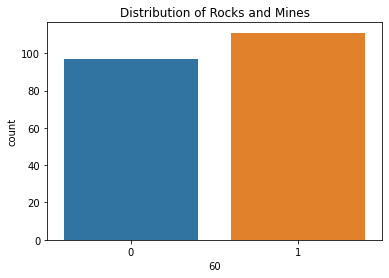

In [9]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=sonar_data[60])
plt.title('Distribution of Rocks and Mines')
plt.show()

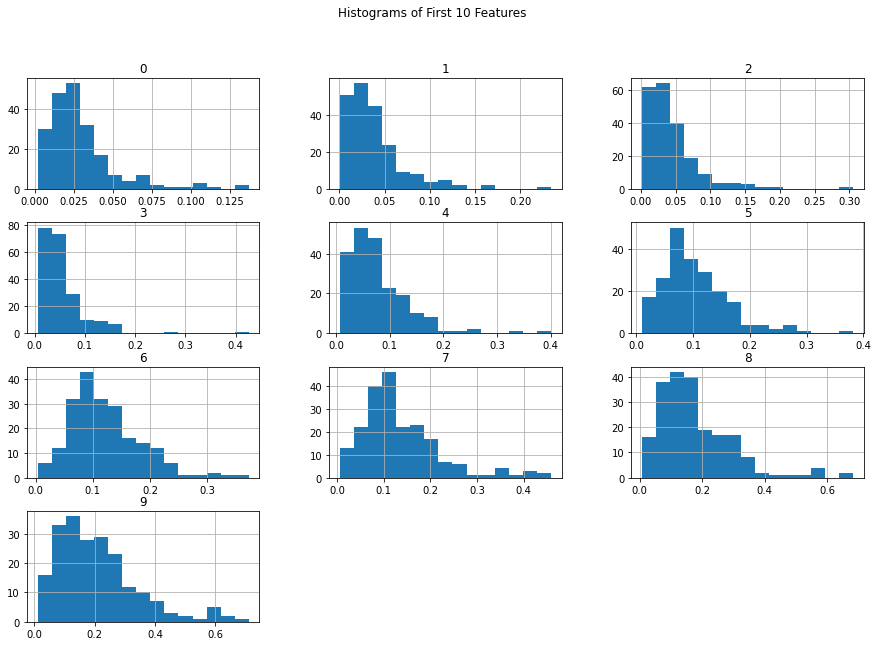

In [10]:
# Histograms of the first ten features
sonar_data.iloc[:, :10].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of First 10 Features')
plt.show()

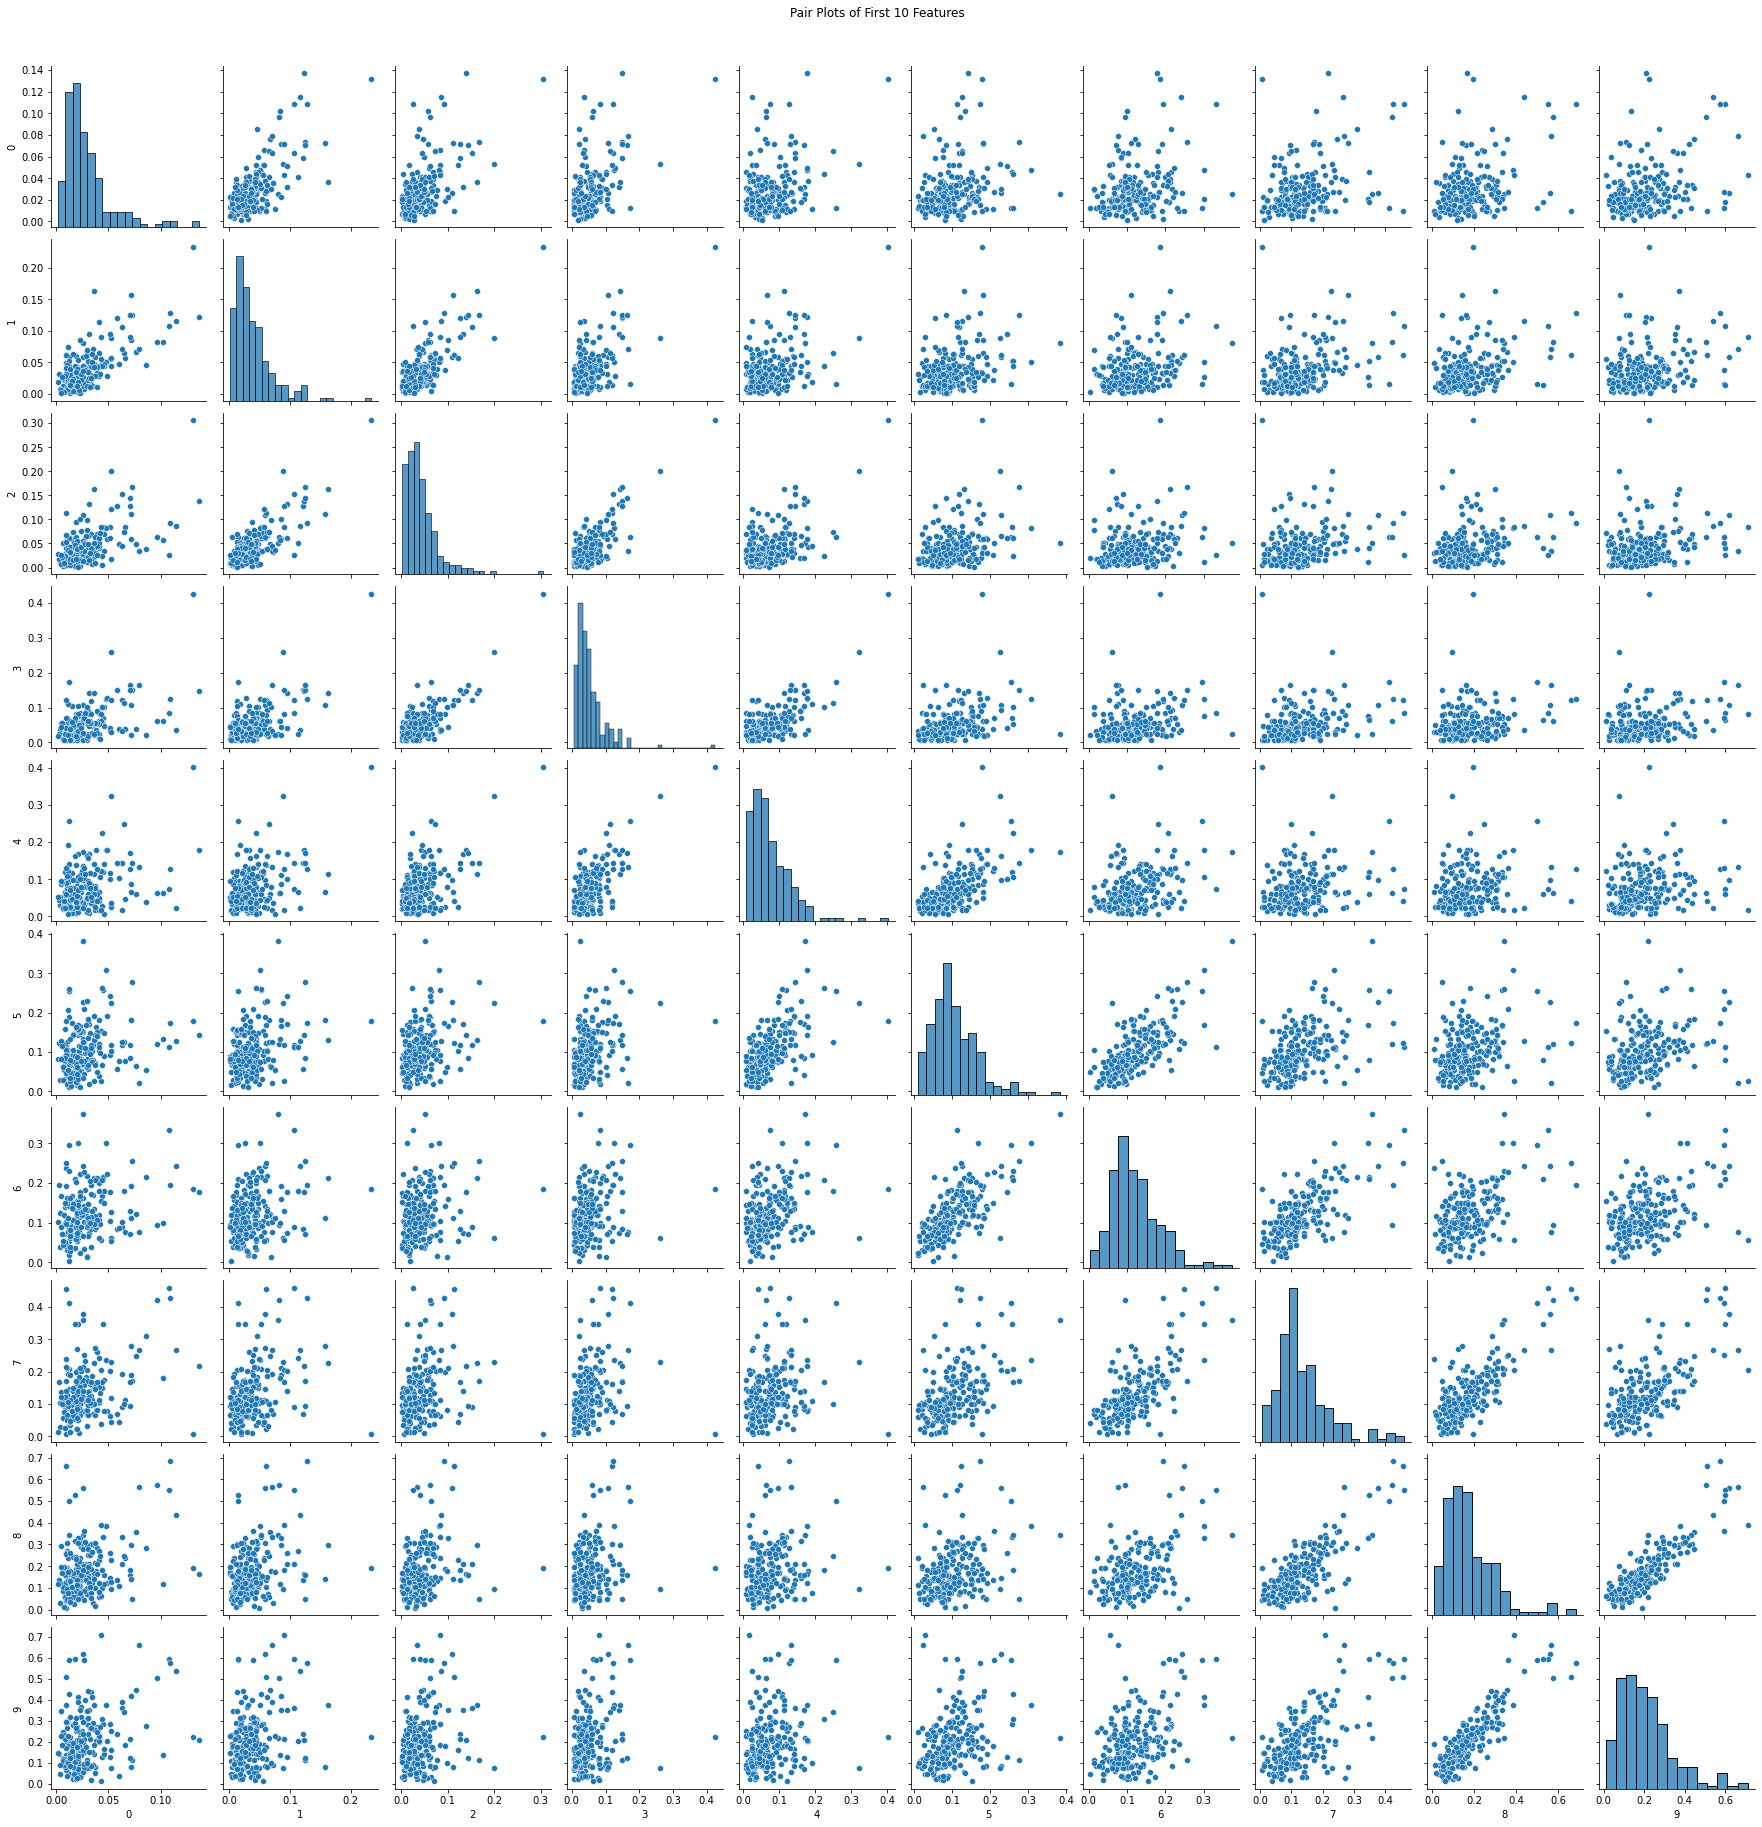

In [11]:
# Pair plot of the first ten features
sns.pairplot(sonar_data.iloc[:, :10])
plt.suptitle('Pair Plots of First 10 Features', y=1.02)
plt.show()

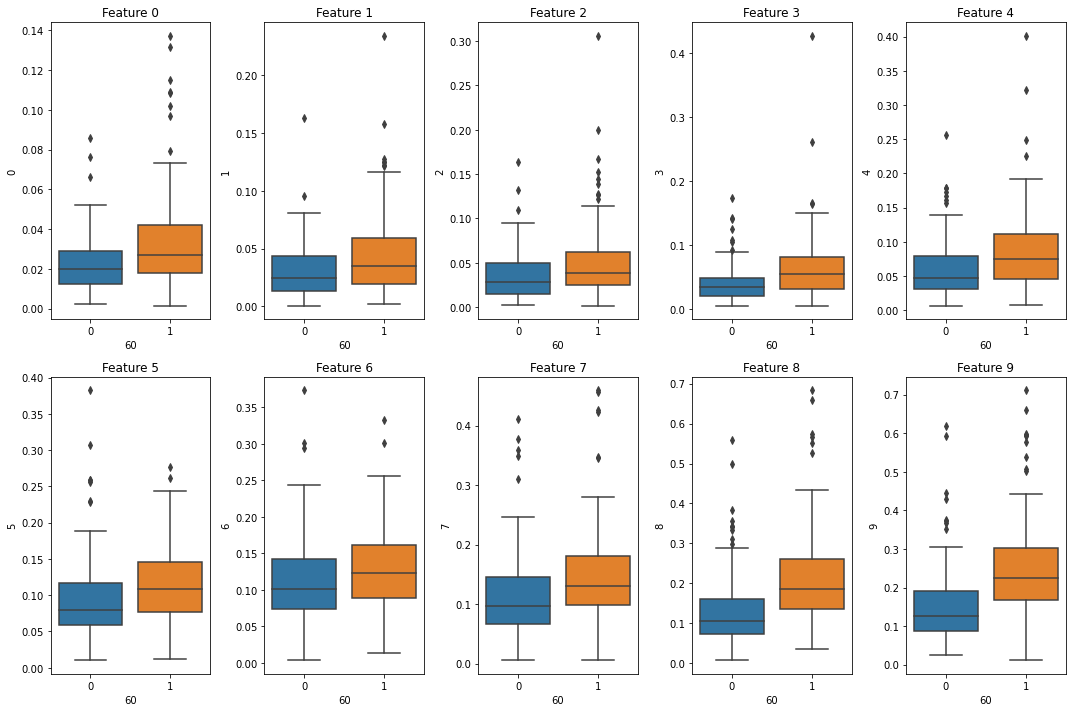

In [12]:
# Box plots to check for outliers
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    sns.boxplot(data=sonar_data, x=60, y=i)
    plt.title(f'Feature {i}')
plt.tight_layout()
plt.show()

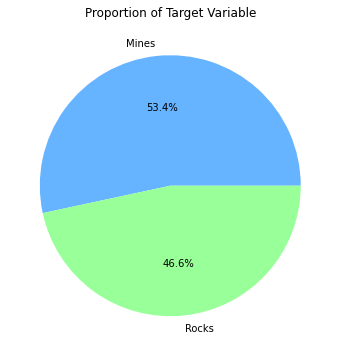

In [13]:
plt.figure(figsize=(6, 6))
sonar_data[60].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'], labels=['Mines', 'Rocks'])
plt.title('Proportion of Target Variable')
plt.ylabel('')
plt.show()


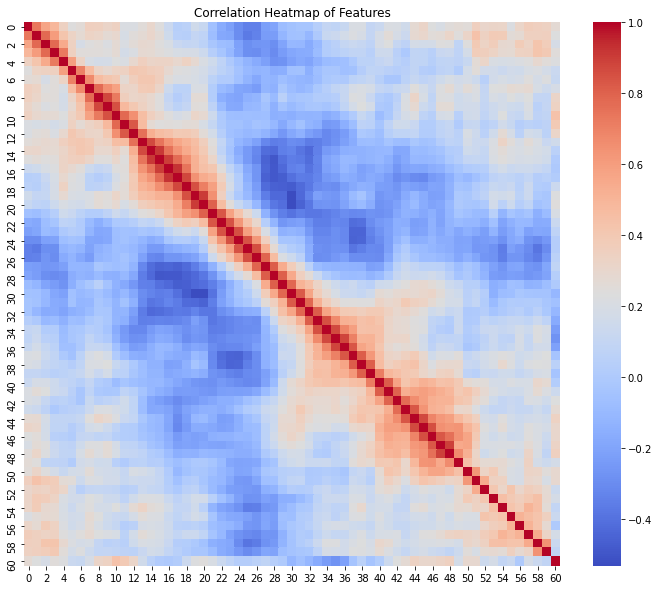

In [14]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(sonar_data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

# Training and Evaluating Logistic Regression Model

In [22]:
# Training the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [23]:
# Evaluating the Logistic Regression model
X_train_prediction = logistic_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
X_test_prediction = logistic_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [24]:
print('Logistic Regression - Accuracy on training data:', training_data_accuracy)
print('Logistic Regression - Accuracy on test data:', test_data_accuracy)


Logistic Regression - Accuracy on training data: 0.9197860962566845
Logistic Regression - Accuracy on test data: 0.8095238095238095


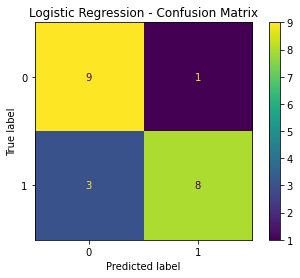

In [25]:
# Confusion matrix for the test data
cm = confusion_matrix(Y_test, X_test_prediction, labels=logistic_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot()
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

In [26]:
# ROC curve and AUC for Logistic Regression
y_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_prob)
roc_auc = roc_auc_score(Y_test, y_prob)

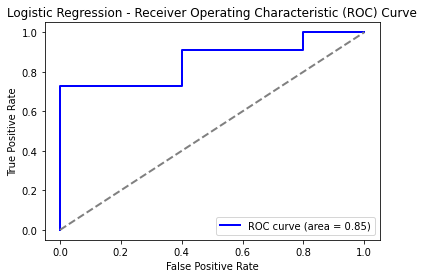

In [27]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [36]:
input_data = (
    0.0307, 0.0523, 0.0653, 0.0521, 0.0611, 0.0577, 0.0665, 0.0664, 0.1460, 0.2792,
    0.3, 0.2301, 0.2456, 0.3423, 0.2123, 0.1122, 0.1345, 0.0763, 0.1654, 0.2876,
    0.3901, 0.3103, 0.2805, 0.1786, 0.1475, 0.0987, 0.1212, 0.2343, 0.2110, 0.1703,
    0.1189, 0.1992, 0.1407, 0.2344, 0.2754, 0.1982, 0.1655, 0.2453, 0.3122, 0.3901,
    0.3322, 0.2877, 0.2343, 0.1234, 0.1765, 0.2445, 0.2098, 0.1678, 0.2134, 0.2233,
    0.1987, 0.1567, 0.2231, 0.2645, 0.2411, 0.1798, 0.1564, 0.1233, 0.1321, 0.1010  
)

# Convert to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape input for single prediction
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Predict using trained logistic model
prediction = logistic_model.predict(input_data_reshaped)

# Print result
print("Prediction:", prediction)

if prediction[0] == 'R':
    print("The object is a Rock")
else:
    print("The object is a Mine")


Prediction: [1]
The object is a Mine
